# Web Scraping

Webscraping is the process of extracting information from a web page or multiple pages and using that information for some other purpose or analysis. It can be used to aggregate and summarize information. Here, we'll show how to use web scraping to obtain information from two different websites.

One thing to note is that many website have terms of service that explicitly forbid web scraping entirely, and some limit the number of requests you send them. Please carefully evaluate any web page you scrape for any rules and regulations they have. 

## Processing HTML with requests and BeautifulSoup

We're going to start with standard web scraping. We'll import `requests` and `BeautifulSoup`. 

`requests` is used to make HTTP requests to urls. HTTP requests allow communication between a server (where a website lives) and a client (e.g. your browser). In our case, the client is the code we're using from the `requests` library. 

`BeautifulSoup` is used to process HTML. HTML is the language that is used to structure web documents. It defines what goes where on the page and to some extent the style of objects on a page. `BeautifulSoup` allows us to navigate HTML and extract useful information from it. 


In [2]:
import requests
from bs4 import BeautifulSoup

We are going to scape a web page designed for scraping: https://www.scrapethissite.com/pages/simple/

This page includes some information about different countries in a tabular format. 

In [3]:
url = 'https://www.scrapethissite.com/pages/simple/'

To retrieve information from this page, we are going to use `requests.get()`. This function uses the HTTP command `GET` to retrieve the information from this URL. 

In [4]:
# Get data from the URL
data = requests.get(url)
data

<Response [200]>

This response code means that we successfully retrieved the page. That means that we can retrieve the HTML of the page by using the `.text` attribute. We'll then look at the first 1000 characters of the page's html. 

In [5]:
html = data.text
html[0:1000]

'<!doctype html>\n<html lang="en">\n  <head>\n    <meta charset="utf-8">\n    <title>Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping</title>\n    <link rel="icon" type="image/png" href="/static/images/scraper-icon.png" />\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta name="description" content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping.">\n\n    <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" rel="stylesheet" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" crossorigin="anonymous">\n    <link href=\'https://fonts.googleapis.com/css?family=Lato:400,700\' rel=\'stylesheet\' type=\'text/css\'>\n    <link rel="stylesheet" type="text/css" href="/static/css/styles.css"

Now, let's use Beautiful Soup to process this HTML. `BeautifulSoup()` takes a second argument where we'll tell it we want to parse HTML, as opposed to other formats. 

In [6]:
soup = BeautifulSoup(html, 'html.parser')

If we print `soup.prettify()`, we can see the HTML in a structured format. 

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Countries of the World: A Simple Example | Scrape This Site | A public sandbox for learning web scraping
  </title>
  <link href="/static/images/scraper-icon.png" rel="icon" type="image/png"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <meta content="A single page that lists information about all the countries in the world. Good for those just get started with web scraping." name="description"/>
  <link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css" integrity="sha256-MfvZlkHCEqatNoGiOXveE8FIwMzZg4W85qfrfIFBfYc= sha512-dTfge/zgoMYpP7QbHy4gWMEGsbsdZeCXz7irItjcC3sPUFtf0kuFbDz/ixG7ArTxmDjLXDmezHubeNikyKGVyQ==" rel="stylesheet"/>
  <link href="https://fonts.googleapis.com/css?family=Lato:400,700" rel="stylesheet" type="text/css"/>
  <link href="/static/css/styles.css" rel="stylesheet" type="text/css"/>
  <meta content="noindex

In HTML, tags define structure. For example, the text of a page lives in the body tag:

```html
<body>
    ...
</body>
```

Tags come in pairs: opening tags and closing tags. Both use angled brackets (`<>`) but closing brackets also use a forward slash (`</>`). Tags can contain content in a single line (`<tag>content</tag>`) or across multiple lines like above. 

Common tags: https://www.geeksforgeeks.org/html-tags-a-to-z-list/

### Retrieve specific HTML tags

When you are trying to retrieve a specific part of a page, it is important to inspect the page to see the structure. On most browswers, you can right click and navigate to "Inspect Element". For instructions on how to inspect, check out this link: [https://blog.hubspot.com/website/how-to-inspect](https://blog.hubspot.com/website/how-to-inspect)

To find all appearances of a certain tag on a webpage, we can use `soup.find_all(tagname)`, where `tagname` is a string like `"div"`, a common type of tag. 

In [8]:
divs = soup.find_all("div")

print("Number of divs: " + str(len(divs)))
print("Example div")
print(divs[1].prettify())

Number of divs: 599
Example div
<div class="col-md-12">
 <ul class="nav nav-tabs">
  <li id="nav-homepage">
   <a class="nav-link hidden-sm hidden-xs" href="/">
    <img id="nav-logo" src="/static/images/scraper-icon.png"/>
    Scrape This Site
   </a>
  </li>
  <li id="nav-sandbox">
   <a class="nav-link" href="/pages/">
    <i class="glyphicon glyphicon-console hidden-sm hidden-xs">
    </i>
    Sandbox
   </a>
  </li>
  <li id="nav-lessons">
   <a class="nav-link" href="/lessons/">
    <i class="glyphicon glyphicon-education hidden-sm hidden-xs">
    </i>
    Lessons
   </a>
  </li>
  <li id="nav-faq">
   <a class="nav-link" href="/faq/">
    <i class="glyphicon glyphicon-flag hidden-sm hidden-xs">
    </i>
    FAQ
   </a>
  </li>
  <li class="pull-right" id="nav-login">
   <a class="nav-link" href="/login/">
    Login
   </a>
  </li>
 </ul>
</div>



As you can see, tags can contin a lot of information, including other tags. `<div>` is a very common tag type, and this page has hundreds of them. 

Each tag can also have a class, and almost all `<div>` tags will have one. These tags are linked to certain styles, which define appearance and to some degree the function of the material in these tags. 

This page stores country data in `<div>` tags with the class `col-md-4 country`.

In [9]:
div_countries = soup.find_all("div", class_="col-md-4 country")
div_countries

[<div class="col-md-4 country">
 <h3 class="country-name">
 <i class="flag-icon flag-icon-ad"></i>
                             Andorra
                         </h3>
 <div class="country-info">
 <strong>Capital:</strong> <span class="country-capital">Andorra la Vella</span><br/>
 <strong>Population:</strong> <span class="country-population">84000</span><br/>
 <strong>Area (km<sup>2</sup>):</strong> <span class="country-area">468.0</span><br/>
 </div>
 </div>,
 <div class="col-md-4 country">
 <h3 class="country-name">
 <i class="flag-icon flag-icon-ae"></i>
                             United Arab Emirates
                         </h3>
 <div class="country-info">
 <strong>Capital:</strong> <span class="country-capital">Abu Dhabi</span><br/>
 <strong>Population:</strong> <span class="country-population">4975593</span><br/>
 <strong>Area (km<sup>2</sup>):</strong> <span class="country-area">82880.0</span><br/>
 </div>
 </div>,
 <div class="col-md-4 country">
 <h3 class="country-name">
 

Let's take a look at the first country div. We'll use `.text` to remove the tag information and `.strip()` to remove some formatting characters

In [10]:
print(div_countries[0].text.strip())

Andorra
                        

Capital: Andorra la Vella
Population: 84000
Area (km2): 468.0


If we look inside of the div, we can find other key information. For instance, each country `div` contains a `div` of class `country-capital`.

In [62]:
div_countries[0].find(class_="country-capital")

<span class="country-capital">Andorra la Vella</span>

There are also similar divs with the classes `country-name`, `country-population`, and `country-area`.

In [68]:
div_countries[0].find(class_="country-name")

<h3 class="country-name">
<i class="flag-icon flag-icon-ad"></i>
                            Andorra
                        </h3>

In [69]:
div_countries[0].find(class_="country-population")

<span class="country-population">84000</span>

In [70]:
div_countries[0].find(class_="country-area")

<span class="country-area">468.0</span>

We can use a for loop to iterate over the country divs to grab each capital. 

In [11]:
capitals = list()

for i in range(0,5):
    
    country = div_countries[i]
    capital = country.find(class_="country-capital").text
    capitals.append(capital)

capitals

['Andorra la Vella', 'Abu Dhabi', 'Kabul', "St. John's", 'The Valley']

We can use this approach to store the information in a pandas data frame. 

In [13]:
import pandas as pd

country_names = list()
capitals = list()
populations = list()
areas = list()

for country in div_countries:
    
    country_name = country.find(class_='country-name').text.strip() # have to remove special characters
    capital = country.find(class_="country-capital").text
    population = country.find(class_="country-population").text
    area = country.find(class_="country-area").text
    
    country_names.append(country_name)
    capitals.append(capital)
    populations.append(population)
    areas.append(area)

country_data_dict = {
    'country': country_names,
    'capital': capitals,
    'population': populations,
    'area': areas
}

countries_df = pd.DataFrame(country_data_dict)
countries_df.head()

,country,capital,population,area
0,Andorra,Andorra la Vella,84000,468.0
1,United Arab Emirates,Abu Dhabi,4975593,82880.0
2,Afghanistan,Kabul,29121286,647500.0
3,Antigua and Barbuda,St. John's,86754,443.0
4,Anguilla,The Valley,13254,102.0


## API - U.S. Bureau of Labor Statistics
Another way to extract data from websites is using APIs (Application Programming Interfaces) that some websites provide. <https://www.programmableweb.com/apis>

APIs are "intermediaries" that allow one software to talk to another. Keep in mind that most APIs have limited usage policies. We will use the U.S. Bureau of Labor Statistics' API to extract data. They have two API's, one of which we can use without registration to get several years of data. We will be using this version: [BLS Public Data API Signatures (Version 1.0)](https://www.bls.gov/developers/api_signature.htm#single).

If you are intested in this API, you can register for [a more powerful API with greater access to data](https://www.bls.gov/developers/home.htm). 

Disclaimer: BLS.gov cannot vouch for the data or analyses derived from these data after the data have been retrieved from BLS.gov.

This API, as well as many others, works with a data format called JSON. JSON looks and acts similarly to a Python dictionary, and we can interact with it with the `json` library. 

In [ ]:
import json

The BLS has many data sets to choose from. We are going to use one on civilian unemployment. 

To interact with the API, instead of using `requests.get()`, we'll use `requests.post()`. The [data series](https://data.bls.gov/toppicks?survey=bls) we are looking at is labeled as LNS13000000 and contains seasonally-adjusted civilian umemployment. We also will interact with a API-specific URL. 

The post will need two other arguments besides the URL to work. We'll provide headers, which provides the website some information about the format we want the data in. We'll also provide some data about the data we want, specifically a series ID and year ranges for the data. 

`json.dumps()` converts a Python dictionary into a json object, while `json.loads()` does the opposite

In [14]:
headers = {'Content-type': 'application/json'}
# civilian unemployment query
post_json = {"seriesid": ['LNS13000000'], "startyear":"2015", "endyear":"2024"}

data = json.dumps(post_json)
p = requests.post('https://api.bls.gov/publicAPI/v1/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

json_data

{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 175,
 'message': [],
 'Results': {'series': [{'seriesID': 'LNS13000000',
    'data': [{'year': '2024',
      'period': 'M08',
      'periodName': 'August',
      'latest': 'true',
      'value': '7115',
      'footnotes': [{}]},
     {'year': '2024',
      'period': 'M07',
      'periodName': 'July',
      'value': '7163',
      'footnotes': [{}]},
     {'year': '2024',
      'period': 'M06',
      'periodName': 'June',
      'value': '6811',
      'footnotes': [{}]},
     {'year': '2024',
      'period': 'M05',
      'periodName': 'May',
      'value': '6649',
      'footnotes': [{}]},
     {'year': '2024',
      'period': 'M04',
      'periodName': 'April',
      'value': '6492',
      'footnotes': [{}]},
     {'year': '2024',
      'period': 'M03',
      'periodName': 'March',
      'value': '6429',
      'footnotes': [{}]},
     {'year': '2024',
      'period': 'M02',
      'periodName': 'February',
      'value': '6458',
      'foot

We can use a similar pipeline as we did above to get the json data into a pandas dictionary. 

In [22]:
pandas_data = {
    'seriesId': [],
    'year': [],
    'period': [],
    'value': []
}

for series in json_data['Results']['series']:
    
    seriesId = series['seriesID']
    
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
                
        pandas_data['seriesId'].append(seriesId)
        pandas_data['year'].append(year)
        pandas_data['period'].append(period)
        pandas_data['value'].append(value)        


Let's convert our dictionary into a pandas DataFrame and take a look at it.

In [24]:
df = pd.DataFrame(pandas_data)
df.head()

,seriesId,year,period,value
0,LNS13000000,2024,M08,7115
1,LNS13000000,2024,M07,7163
2,LNS13000000,2024,M06,6811
3,LNS13000000,2024,M05,6649
4,LNS13000000,2024,M04,6492


When you are loading data from a website, it can sometimes be a good idea to check how the data loaded into pandas. For instance, sometimes numerical variables are treated as categorical variables. We can the data type of our columns with `df.dtypes`.

In [107]:
df.dtypes

seriesId     object
year         object
period       object
value        object
footnotes    object
dtype: object

It looks like `'year'` and `'value'` are currently object columns, which means they will be treated as strings. We can change the column by using `.astype('int64')` and re-assigning the output to our columns. `'int64'` is a pandas-specific data type for integer values. 

In [118]:
df['year'] = df['year'].astype('int64')
df['value'] = df['value'].astype('int64')
df.dtypes

seriesId     object
year          int64
period       object
value         int64
footnotes    object
dtype: object

Now that we've fixed the data types of our variables, we're going to summarize citizen employment unemployment by year. To do this, we can group our data by year with `.groupby()` and then calculating the mean. 

In [127]:
year_groups = df.groupby('year')
unemployment_by_year = year_groups['value'].mean()
unemployment_by_year

year
2019     5999.166667
2020    12951.666667
2021     8626.583333
2022     5994.166667
2023     6078.333333
2024     6655.125000
Name: value, dtype: float64

When you produce a summary of a grouped DataFrame, you can use `.reset_index()` to turn it back into a standard, non-grouped data frame. 

In [129]:
unemployment_by_year_df = unemployment_by_year.reset_index()
unemployment_by_year_df

,year,value
0,2019,5999.166667
1,2020,12951.666667
2,2021,8626.583333
3,2022,5994.166667
4,2023,6078.333333
5,2024,6655.125000


Now, let's use matplotlib to plot the change in civilian unemployment over the last few years. 

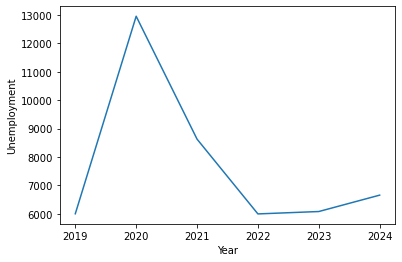

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax.plot(unemployment_by_year_df['year'], unemployment_by_year_df['value'])
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment')
plt.show()

Finally, we can save our unemployment data for future use or storage. 

In [114]:
df.to_csv('output.csv')

## Resources

- User identifying agents
https://www.zenrows.com/blog/python-requests-user-agent#what-is
- selenium